Found 2121 images belonging to 3 classes.
Found 102 images belonging to 3 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🚀 Gerçekçi TL Eğitimi Başlıyor (Maskeleri düşürme vakti)...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.3846 - loss: 1.3909
Epoch 1: val_accuracy improved from -inf to 0.64706, saving model to /content/best_resnet_tl_honest.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 73s 819ms/step - accuracy: 0.3851 - loss: 1.3896 - val_accuracy: 0.6471 - val_loss: 0.8556 - learning_rate: 1.0000e-05
Epoch 2/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.4791 - loss: 1.1123
Epoch 2: val_accuracy improved from 0.64706 to 0.71569, saving model to /content/best_resnet_tl_honest.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 574ms/step - accuracy: 0.4794 - loss: 1.1120 - val_accuracy: 0.7157 - val_loss: 0.7059 - learning_rate: 1.0000e-05
Epoch 3/30
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.5653 - loss: 0.9289
Epoch 3: val_accuracy improved from 0.71569 to 0.76471, saving model to /content/best_resnet_tl_honest.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 38s 573ms/step - accuracy: 0.5656 - loss: 0.9283 - val_accuracy: 0.7647 - val_loss: 0.6121 - learni

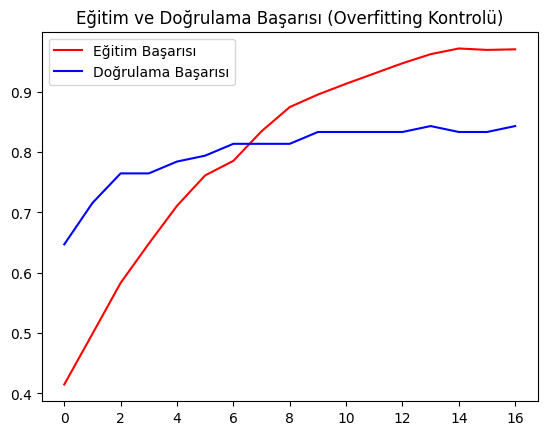

In [2]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- 1. AYARLAR ---
ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'
EXTRACT_PATH = '/content/uclm_tl_train'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NEW_LEARNING_RATE = 0.00001
EPOCHS = 30

# --- 2. ZIP'TEN ÇIKARMA ---
if not os.path.exists(EXTRACT_PATH):
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

# --- 3. VERİ YÜKLEYİCİLER (DÜZELTİLDİ) ---
train_dir = os.path.join(EXTRACT_PATH, 'train')
val_dir = os.path.join(EXTRACT_PATH, 'val')

# KRİTİK DEĞİŞİKLİK: rescale=1./255 kaldırıldı, orijinal preprocess_input eklendi.
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI ---
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(224, 224, 3))

# Son 20 katman açık kalsın (Fine-tuning için standart)
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. CALLBACKS ---
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/best_resnet_tl_honest.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)

# --- 6. DERLEME VE EĞİTİM ---
model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
              loss='categorical_crossentropy', metrics=['accuracy'])

print("\n🚀 Gerçekçi TL Eğitimi Başlıyor (Maskeleri düşürme vakti)...")
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# --- 7. OVERFITTING ANALİZİ (GÖRSEL KANIT) ---
def plot_results(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Eğitim Başarısı')
    plt.plot(epochs, val_acc, 'b', label='Doğrulama Başarısı')
    plt.title('Eğitim ve Doğrulama Başarısı (Overfitting Kontrolü)')
    plt.legend()
    plt.show()

plot_results(history)

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- 1. AYARLAR ---
ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'
EXTRACT_PATH = '/content/uclm_tl_train'
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NEW_LEARNING_RATE = 0.00001 # LR 10^-5 olarak güncellendi
EPOCHS = 50

# --- 2. ZIP'TEN ÇIKARMA ---
if not os.path.exists(EXTRACT_PATH):
    print("📦 TL Verileri zip'ten çıkarılıyor...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)
    print("✅ Çıkarma tamamlandı.")

# --- 3. VERİ YÜKLEYİCİLER ---
train_dir = os.path.join(EXTRACT_PATH, 'train')
val_dir = os.path.join(EXTRACT_PATH, 'val')

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Fine-Tuning Modu) ---
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Son 20 katmanı eğitime açıyoruz
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. CALLBACKS ---
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/best_resnet_tl.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-7)

# --- 6. DERLEME VE EĞİTİM ---
model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(f"\n🚀 ResNet50 Fine-Tuning Başlıyor (Son 20 Katman Açık, LR: {NEW_LEARNING_RATE})...\n")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# --- 7. DRIVE'A KAYDETME ---
save_dir = "/content/drive/MyDrive/Ara Proje/saved_models/ResNet_Results/"
if not os.path.exists(save_dir): os.makedirs(save_dir)

model_path = os.path.join(save_dir, "resnet50_uclm_tl_fine_tuned.keras")
model.save(model_path)
print(f"✅ Model kaydedildi: {model_path}")

Found 2121 images belonging to 3 classes.
Found 102 images belonging to 3 classes.

🚀 ResNet50 Fine-Tuning Başlıyor (Son 20 Katman Açık, LR: 1e-05)...

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 605ms/step - accuracy: 0.3393 - loss: 1.2434
Epoch 1: val_accuracy improved from -inf to 0.12745, saving model to /content/best_resnet_tl.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 66s 753ms/step - accuracy: 0.3397 - loss: 1.2428 - val_accuracy: 0.1275 - val_loss: 1.3025 - learning_rate: 1.0000e-05
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.4153 - loss: 1.1140
Epoch 2: val_accuracy did not improve from 0.12745
67/67 ━━━━━━━━━━━━━━━━━━━━ 37s 551ms/step - accuracy: 0.4158 - loss: 1.1136 - val_accuracy: 0.1275 - val_loss: 1.2275 - learning_rate: 1.0000e-05
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.5075 - loss: 0.9961
Epoch 3: val_accuracy did not improve from 0.12745
67/67 ━━━━━━━━━━━━━━━━━━━━ 37s 553ms/step - accuracy: 0.5078 - loss: 0.9956 - val_accuracy: 0.127

In [ ]:
import os
import zipfile

# Dosya yolunu kontrol edelim
zip_path = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'

if os.path.exists(zip_path):
    print(f"✅ Dosya bulundu: {zip_path}")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Klasör yapısını ve dosya sayılarını listele
        file_list = zip_ref.namelist()

        counts = {}
        for f in file_list:
            if not f.endswith('/'):
                parts = f.split('/')
                if len(parts) >= 3:
                    key = f"{parts[0]} | {parts[1]}" # örn: train | normal
                    counts[key] = counts.get(key, 0) + 1

        print("\n📊 Dosya İçerik Özeti:")
        print("-" * 30)
        for k, v in sorted(counts.items()):
            print(f"{k:<20} : {v} resim")
else:
    print(f"❌ '{zip_path}' bulunamadı. Lütfen dosya adını veya konumunu kontrol et.")

✅ Dosya bulundu: /content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip

📊 Dosya İçerik Özeti:
------------------------------
test | benign        : 27 resim
test | malign        : 14 resim
test | normal        : 63 resim
train | benign       : 709 resim
train | malign       : 547 resim
train | normal       : 865 resim
val | benign         : 26 resim
val | malign         : 13 resim
val | normal         : 63 resim


🔄 En iyi model yükleniyor...
Found 104 images belonging to 3 classes.
🔮 Tahminler yapılıyor...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step

📊 CLASSIFICATION REPORT
------------------------------
              precision    recall  f1-score   support

      benign       0.82      0.52      0.64        27
      malign       0.71      0.71      0.71        14
      normal       0.78      0.90      0.84        63

    accuracy                           0.78       104
   macro avg       0.77      0.71      0.73       104
weighted avg       0.78      0.78      0.77       104


🧩 CONFUSION MATRIX


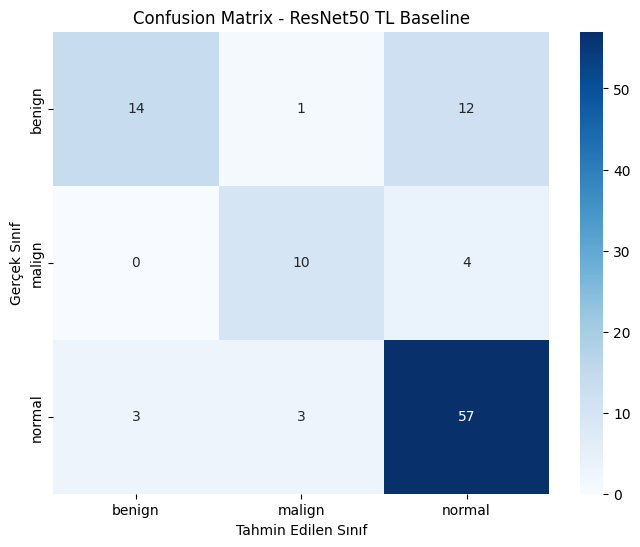

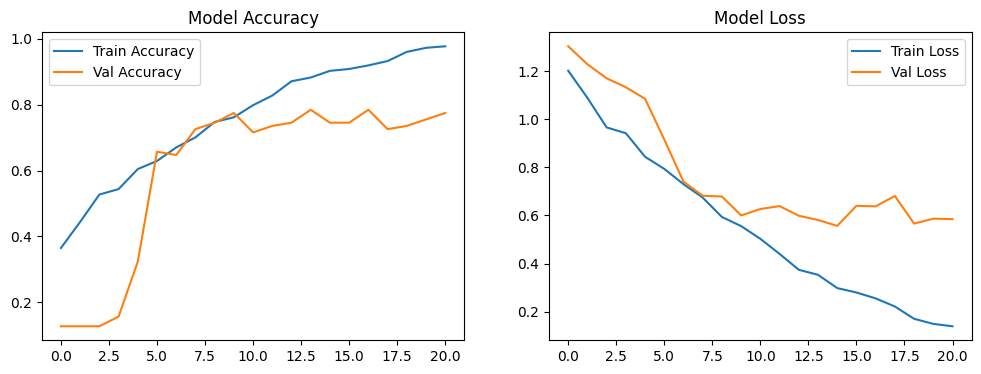

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model

# 1. En İyi Modeli Yükle
print("🔄 En iyi model yükleniyor...")
best_model = load_model('/content/best_resnet_tl.keras')

# 2. Test Verilerini Hazırla
# Not: shuffle=False olması çok önemli, yoksa metrikler yanlış çıkar
test_dir = os.path.join(EXTRACT_PATH, 'test')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# 3. Tahminleri Al
print("🔮 Tahminler yapılıyor...")
predictions = best_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 4. Classification Report Yazdır (Precision, Recall, F1)
print("\n📊 CLASSIFICATION REPORT")
print("-" * 30)
print(classification_report(y_true, y_pred, target_names=class_labels))

# 5. Confusion Matrix Çizdir
print("\n🧩 CONFUSION MATRIX")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - ResNet50 TL Baseline')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

# 6. Eğitim Geçmişini Görselleştir (Loss ve Accuracy)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

**NasNetLarge kodları with buc-uclm
**

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- 1. AYARLAR ---
ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'
EXTRACT_PATH = '/content/uclm_tl_train'
IMAGE_SIZE = (331, 331) # NASNetLarge için standart giriş boyutu 331x331'dir
BATCH_SIZE = 16 # Model çok büyük olduğu için RAM koruması adına 16 yaptık
NEW_LEARNING_RATE = 0.00001
EPOCHS = 50

# --- 2. ZIP'TEN ÇIKARMA ---
if not os.path.exists(EXTRACT_PATH):
    print("📦 TL Verileri zip'ten çıkarılıyor...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)
    print("✅ Çıkarma tamamlandı.")

# --- 3. VERİ YÜKLEYİCİLER ---
train_dir = os.path.join(EXTRACT_PATH, 'train')
val_dir = os.path.join(EXTRACT_PATH, 'val')

datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (NASNetLarge Fine-Tuning) ---
base_model = NASNetLarge(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# NASNetLarge çok derin olduğu için son 30 katmanı açıyoruz (daha iyi adaptasyon için)
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. CALLBACKS ---
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/best_nasnet_tl.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-7)

# --- 6. DERLEME VE EĞİTİM ---
model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(f"\n🚀 NASNetLarge Fine-Tuning Başlıyor (Son 30 Katman Açık, LR: {NEW_LEARNING_RATE})...\n")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# --- 7. DRIVE'A KAYDETME ---
save_dir = "/content/drive/MyDrive/Ara Proje/saved_models/NasNet_Results/"
if not os.path.exists(save_dir): os.makedirs(save_dir)

model_path = os.path.join(save_dir, "nasnetlarge_uclm_tl_fine_tuned.keras")
model.save(model_path)
print(f"✅ Model kaydedildi: {model_path}")

Found 2121 images belonging to 3 classes.
Found 102 images belonging to 3 classes.
343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

🚀 NASNetLarge Fine-Tuning Başlıyor (Son 30 Katman Açık, LR: 1e-05)...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 750ms/step - accuracy: 0.3789 - loss: 1.1430
Epoch 1: val_accuracy improved from -inf to 0.55882, saving model to /content/best_nasnet_tl.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.3790 - loss: 1.1428 - val_accuracy: 0.5588 - val_loss: 0.9266 - learning_rate: 1.0000e-05
Epoch 2/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.4575 - loss: 1.0433
Epoch 2: val_accuracy improved from 0.55882 to 0.77451, saving model to /content/best_nasnet_tl.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 43s 325ms/step - accuracy: 0.4575 - loss: 1.0432 - val_accuracy: 0.7745 - val_loss: 0.8046 - learning_rate: 1.0000e-05
Epoch 3/50
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.4894 - loss: 0.9996
Epoch 3: val_accuracy improved from 0.77451 to 0.78431, saving model to /content/best_nasnet_tl.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 43s 319ms/step - accuracy: 0.4895 - loss: 0.9996 - val_accuracy: 0.7843 - val_loss: 0.7482 - learning_rate: 1.

🔄 NASNetLarge modeli yükleniyor...
Found 104 images belonging to 3 classes.
🔮 Test seti üzerinde tahminler yapılıyor...
7/7 ━━━━━━━━━━━━━━━━━━━━ 107s 11s/step

📋 1. SINIF BAZLI DETAYLI RAPOR
------------------------------------------------------------
              precision    recall  f1-score   support

      benign       0.75      0.44      0.56        27
      malign       0.61      0.79      0.69        14
      normal       0.84      0.94      0.89        63

    accuracy                           0.79       104
   macro avg       0.73      0.72      0.71       104
weighted avg       0.79      0.79      0.77       104


🏆 2. TOPLAM (GLOBAL) SKORLAR
------------------------------------------------------------
Overall Accuracy         : %78.85
Weighted Avg Precision   : %78.76
Weighted Avg Recall      : %78.85
Weighted Avg F1-Score    : %77.49


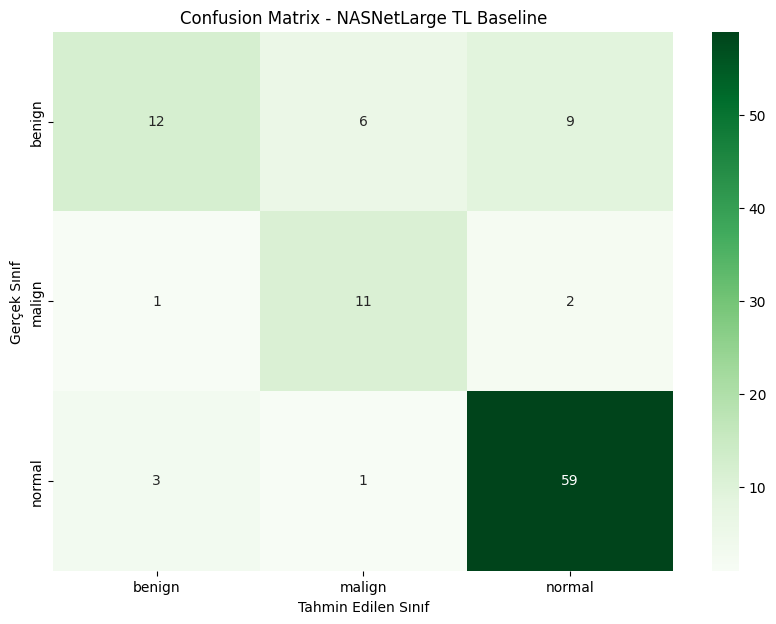

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Modeli Yükle (NASNet için kaydettiğin yol)
print("🔄 NASNetLarge modeli yükleniyor...")
best_model = load_model('/content/best_nasnet_tl.keras')

# 2. Test Verilerini Hazırlama
# ÖNEMLİ: NASNetLarge için target_size=(331, 331) olmalı!
IMAGE_SIZE = (331, 331)
BATCH_SIZE = 16
EXTRACT_PATH = '/content/uclm_tl_train'
test_dir = os.path.join(EXTRACT_PATH, 'test')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# 3. Tahminleri Al
print("🔮 Test seti üzerinde tahminler yapılıyor...")
predictions = best_model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# 4. SINIF BAZLI METRİKLER (Detailed Report)
print("\n📋 1. SINIF BAZLI DETAYLI RAPOR")
print("-" * 60)
print(classification_report(y_true, y_pred, target_names=class_labels))

# 5. TOPLAM (GLOBAL) METRİKLER
print("\n🏆 2. TOPLAM (GLOBAL) SKORLAR")
print("-" * 60)
acc = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print(f"Overall Accuracy         : %{acc*100:.2f}")
print(f"Weighted Avg Precision   : %{precision*100:.2f}")
print(f"Weighted Avg Recall      : %{recall*100:.2f}")
print(f"Weighted Avg F1-Score    : %{f1*100:.2f}")

# 6. CONFUSION MATRIX (Görselleştirme)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - NASNetLarge TL Baseline')
plt.ylabel('Gerçek Sınıf')
plt.xlabel('Tahmin Edilen Sınıf')
plt.show()

In [ ]:
import os
import zipfile
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1. Ayarlar
ZIP_PATH = '/content/denem.zip'
EXTRACT_PATH = '/content/deneme_nasnet'
MODEL_PATH = '/content/best_nasnet_tl.keras' # NASNet modelin
IMAGE_SIZE = (331, 331) # NASNetLarge için 331 şart!

class_names = ['benign', 'malign', 'normal']

# 2. Zip'ten Çıkar
if not os.path.exists(EXTRACT_PATH):
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

# 3. Model Yükle
model = load_model(MODEL_PATH)

# 4. Tahmin Fonksiyonu
def predict_nasnet(folder_path):
    results = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = image.load_img(img_path, target_size=IMAGE_SIZE)
                img_array = image.img_to_array(img)
                img_array = np.expand_dims(img_array, axis=0)
                img_array /= 255.0

                prediction = model.predict(img_array, verbose=0)
                idx = np.argmax(prediction)
                results.append((file, class_names[idx], np.max(prediction)*100))
    return results

# 5. Sonuçları Listele
predictions = predict_nasnet(EXTRACT_PATH)
print(f"{'Dosya Adı':<40} | {'Tahmin':<10} | {'Güven'}")
print("-" * 65)
for f, l, c in predictions:
    print(f"{f:<40} | {l:<10} | %{c:.2f}")

Dosya Adı                                | Tahmin     | Güven
-----------------------------------------------------------------
benign (100)-rotated1-rotated2.png       | benign     | %65.09
normal (107).png                         | benign     | %45.26
normal (11).png                          | benign     | %82.39
benign (107)-rotated2-sharpened.png      | benign     | %96.79
normal (106).png                         | benign     | %68.59
benign (103)-rotated2-rotated1.png       | benign     | %95.74
malignant (106)-sharpened-rotated32.png  | benign     | %52.49
normal (108).png                         | benign     | %56.19
malignant (109)-rotated1-rotated32.png   | benign     | %52.30
benign (105)-rotated2-rotated2.png       | benign     | %89.43
normal (10).png                          | benign     | %76.83
benign (101)-sharpened.jpg               | benign     | %97.12
normal (109).png                         | benign     | %55.72
benign (108)-rotated2-rotated2.png       | benign    

In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.applications.nasnet import NASNetLarge, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- 1. AYARLAR ---
ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'
EXTRACT_PATH = '/content/uclm_tl_train'
IMAGE_SIZE = (331, 331)
BATCH_SIZE = 16
NEW_LEARNING_RATE = 0.00001
EPOCHS = 20

# --- 2. ZIP'TEN ÇIKARMA ---
if not os.path.exists(EXTRACT_PATH):
    print("📦 TL Verileri zip'ten çıkarılıyor...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)
    print("✅ Çıkarma tamamlandı.")

# --- 3. VERİ YÜKLEYİCİLER (KRİTİK GÜNCELLEME: preprocess_input) ---
train_dir = os.path.join(EXTRACT_PATH, 'train')
val_dir = os.path.join(EXTRACT_PATH, 'val')

# rescale=1./255 yerine NASNet'in kendi ön işleme fonksiyonunu kullanıyoruz
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Robust Mimari) ---
# Pooling='avg' yerine dışarıdan GlobalAverage ekleyerek modelin geneli görmesini sağlıyoruz
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Son 20 katman açık, gerisi donduruldu
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x) # Açıkça Pooling ekledik
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. CALLBACKS ---
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/best_nasnet_tl_robust.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-7)

# --- 6. DERLEME VE EĞİTİM ---
model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(f"\n🚀 Robust NASNetLarge Fine-Tuning Başlıyor (Son 20 Katman Açık, LR: {NEW_LEARNING_RATE})...\n")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# --- 7. DRIVE'A KAYDETME ---
save_dir = "/content/drive/MyDrive/Ara Proje/saved_models/NasNet_Results/"
if not os.path.exists(save_dir): os.makedirs(save_dir)

model_path = os.path.join(save_dir, "nasnetlarge_uclm_tl_robust.keras")
model.save(model_path)
print(f"✅ Robust Model kaydedildi: {model_path}")

Found 2121 images belonging to 3 classes.
Found 102 images belonging to 3 classes.

🚀 Robust NASNetLarge Fine-Tuning Başlıyor (Son 20 Katman Açık, LR: 1e-05)...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.3102 - loss: 1.2037
Epoch 1: val_accuracy improved from -inf to 0.59804, saving model to /content/best_nasnet_tl_robust.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.3103 - loss: 1.2034 - val_accuracy: 0.5980 - val_loss: 0.9570 - learning_rate: 1.0000e-05
Epoch 2/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.4307 - loss: 1.0772
Epoch 2: val_accuracy improved from 0.59804 to 0.72549, saving model to /content/best_nasnet_tl_robust.keras
133/133 ━━━━━━━━━━━━━━━━━━━━ 44s 327ms/step - accuracy: 0.4308 - loss: 1.0771 - val_accuracy: 0.7255 - val_loss: 0.8251 - learning_rate: 1.0000e-05
Epoch 3/20
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.4669 - loss: 1.0539
Epoch 3: val_accuracy did not improve from 0.72549
133/133 ━━━━━━━━━━━━━━━━━━━━ 40s 298ms/step - accuracy: 0.4670 - loss: 1.0537 - val_accuracy: 0.6863 - val_loss: 0.7638 - learning_rate: 1.0000e-05
Epoch 4/20
133/133 ━━━━━━━━━

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.nasnet import preprocess_input

# --- 1. MODEL VE VERİ YOLLARI ---
MODEL_PATH = '/content/drive/MyDrive/Ara Proje/saved_models/NasNet_Results/nasnetlarge_uclm_tl_robust.keras'
ZIP_PATH = '/content/denem.zip'
UCLM_ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip' # Metrikler için ana veri
EXTRACT_PATH_UCLM = '/content/uclm_tl_test'
EXTRACT_PATH_DENEM = '/content/deneme_test'
IMAGE_SIZE = (331, 331)
class_names = ['benign', 'malign', 'normal']

# --- 2. MODELİ YÜKLE ---
print("🔄 Model Drive'dan yükleniyor...")
if os.path.exists(MODEL_PATH):
    model = load_model(MODEL_PATH)
    print("✅ Model başarıyla yüklendi.")
else:
    print("❌ HATA: Model dosyası belirtilen yolda bulunamadı!")

# --- 3. UCLM TEST VERİLERİNİ ÇIKAR VE METRİKLERİ HESAPLA ---
if not os.path.exists(EXTRACT_PATH_UCLM):
    print("📦 Metrikler için test verileri çıkarılıyor...")
    with zipfile.ZipFile(UCLM_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH_UCLM)

test_dir = os.path.join(EXTRACT_PATH_UCLM, 'test')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMAGE_SIZE, batch_size=16, class_mode='categorical', shuffle=False
)

print("\n📊 1. TOPLAM VE SINIF BAZLI METRİKLER")
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# Sınıf bazlı
print("-" * 60)
print(classification_report(y_true, y_pred, target_names=class_names))

# Toplam Skorlar
acc = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

print("-" * 60)
print(f"Overall Accuracy         : %{acc*100:.2f}")
print(f"Weighted Avg Precision   : %{precision*100:.2f}")
print(f"Weighted Avg Recall      : %{recall*100:.2f}")
print(f"Weighted Avg F1-Score    : %{f1*100:.2f}")

# --- 4. denem.zip TAHMİNLERİNİ YAZDIR ---
if not os.path.exists(EXTRACT_PATH_DENEM):
    print("\n📦 denem.zip dosyası çıkarılıyor...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH_DENEM)

print("\n🔮 2. denem.zip DIŞ VERİ TAHMİNLERİ")
print(f"{'Dosya Adı':<40} | {'Tahmin':<10} | {'Güven'}")
print("-" * 65)

correct_count = 0
total_count = 0

for root, _, files in os.walk(EXTRACT_PATH_DENEM):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            img = image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array)

            pred = model.predict(img_array, verbose=0)
            idx = np.argmax(pred)
            label = class_names[idx]
            conf = np.max(pred) * 100

            # Doğru mu değil mi kontrolü (dosya isminden)
            true_label = "normal" if "normal" in file else ("malignant" if "malignant" in file else "benign")
            # class_names'deki 'malign' ile dosya ismindeki 'malignant' eşleşmesi için:
            if label == "malign": label_check = "malignant"
            else: label_check = label

            is_correct = "✅" if label_check in file else "❌"
            if is_correct == "✅": correct_count += 1
            total_count += 1

            print(f"{file:<40} | {label:<10} | %{conf:.2f} {is_correct}")

print("-" * 65)
print(f"🏁 Dış Veri Başarı Sonucu: {total_count} resimde {correct_count} doğru. Başarı: %{(correct_count/total_count)*100:.2f}")

🔄 Model Drive'dan yükleniyor...
✅ Model başarıyla yüklendi.
📦 Metrikler için test verileri çıkarılıyor...
Found 104 images belonging to 3 classes.

📊 1. TOPLAM VE SINIF BAZLI METRİKLER


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 128s 10s/step
------------------------------------------------------------
              precision    recall  f1-score   support

      benign       0.65      0.48      0.55        27
      malign       0.57      0.57      0.57        14
      normal       0.83      0.92      0.87        63

    accuracy                           0.76       104
   macro avg       0.68      0.66      0.67       104
weighted avg       0.75      0.76      0.75       104

------------------------------------------------------------
Overall Accuracy         : %75.96
Weighted Avg Precision   : %74.76
Weighted Avg Recall      : %75.96
Weighted Avg F1-Score    : %74.89

📦 denem.zip dosyası çıkarılıyor...

🔮 2. denem.zip DIŞ VERİ TAHMİNLERİ
Dosya Adı                                | Tahmin     | Güven
-----------------------------------------------------------------
benign (100)-rotated1-rotated2.png       | benign     | %61.07 ✅
normal (107).png                         | normal     | %

XCEPTİON STARTS


In [ ]:
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# --- 1. AYARLAR ---
ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'
EXTRACT_PATH = '/content/uclm_tl_train'
IMAGE_SIZE = (299, 299) # Xception için standart boyut
BATCH_SIZE = 32
NEW_LEARNING_RATE = 0.0001
EPOCHS = 50

# --- 2. ZIP'TEN ÇIKARMA ---
if not os.path.exists(EXTRACT_PATH):
    print("📦 TL Verileri çıkarılıyor...")
    with zipfile.ZipFile(ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH)

# --- 3. VERİ YÜKLEYİCİLER (Xception Preprocess) ---
train_dir = os.path.join(EXTRACT_PATH, 'train')
val_dir = os.path.join(EXTRACT_PATH, 'val')

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = datagen.flow_from_directory(
    train_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen.flow_from_directory(
    val_dir, target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Xception Fine-Tuning) ---
base_model = Xception(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))

# Son 20 katmanı açıyoruz
base_model.trainable = True
for layer in base_model.layers[:-20]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. CALLBACKS ---
early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
checkpoint = ModelCheckpoint('/content/best_xception_tl.keras', monitor='val_accuracy', save_best_only=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, min_lr=1e-7)

# --- 6. DERLEME VE EĞİTİM ---
model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(f"\n🚀 Xception Fine-Tuning Başlıyor (Son 20 Katman Açık)...\n")

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

# --- 7. DRIVE'A KAYDETME ---
save_dir = "/content/drive/MyDrive/Ara Proje/saved_models/Xception_Results/"
if not os.path.exists(save_dir): os.makedirs(save_dir)

model_path = os.path.join(save_dir, "xception_uclm_tl_robust.keras")
model.save(model_path)
print(f"✅ Xception Model kaydedildi: {model_path}")

📦 TL Verileri çıkarılıyor...
Found 2121 images belonging to 3 classes.
Found 102 images belonging to 3 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🚀 Xception Fine-Tuning Başlıyor (Son 20 Katman Açık)...



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5012 - loss: 0.9858
Epoch 1: val_accuracy improved from -inf to 0.83333, saving model to /content/best_xception_tl.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.5028 - loss: 0.9839 - val_accuracy: 0.8333 - val_loss: 0.5225 - learning_rate: 1.0000e-04
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 549ms/step - accuracy: 0.8434 - loss: 0.4590
Epoch 2: val_accuracy did not improve from 0.83333
67/67 ━━━━━━━━━━━━━━━━━━━━ 39s 578ms/step - accuracy: 0.8436 - loss: 0.4584 - val_accuracy: 0.8039 - val_loss: 0.5450 - learning_rate: 1.0000e-04
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 551ms/step - accuracy: 0.9347 - loss: 0.2336
Epoch 3: val_accuracy improved from 0.83333 to 0.85294, saving model to /content/best_xception_tl.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 40s 593ms/step - accuracy: 0.9347 - loss: 0.2334 - val_accuracy: 0.8529 - val_loss: 0.4441 - learning_rate: 1.0000e-04
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step -

In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

# --- 1. YOLLAR VE MODEL YÜKLEME ---
MODEL_PATH = '/content/best_xception_tl.keras' # Colab'daki güncel model
ZIP_DATA_PATH = '/content/denem.zip'
UCLM_ZIP_PATH = '/content/drive/MyDrive/Ara Proje/datalar/uclm_for-TL.zip'
EXTRACT_PATH_UCLM = '/content/uclm_test_xception'
EXTRACT_PATH_DENEM = '/content/deneme_test_xception'
IMAGE_SIZE = (299, 299)
class_names = ['benign', 'malign', 'normal']

print("🔄 Xception Modeli yükleniyor...")
model = load_model(MODEL_PATH)
print("✅ Model yüklendi.")

# --- 2. UCLM İÇ TEST ANALİZİ ---
if not os.path.exists(EXTRACT_PATH_UCLM):
    with zipfile.ZipFile(UCLM_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH_UCLM)

test_dir = os.path.join(EXTRACT_PATH_UCLM, 'test')
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMAGE_SIZE, batch_size=32, class_mode='categorical', shuffle=False
)

print("\n📊 1. UCLM TEST SETİ SONUÇLARI")
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

print("-" * 60)
print(classification_report(y_true, y_pred, target_names=class_names))
print(f"🏆 Toplam Accuracy: %{accuracy_score(y_true, y_pred)*100:.2f}")

# --- 3. denem.zip DIŞ VERİ ANALİZİ ---
if not os.path.exists(EXTRACT_PATH_DENEM):
    with zipfile.ZipFile(ZIP_DATA_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACT_PATH_DENEM)

print("\n🔮 2. denem.zip DIŞ VERİ TAHMİNLERİ")
print(f"{'Dosya Adı':<40} | {'Tahmin':<10} | {'Güven'}")
print("-" * 75)

correct = 0
total = 0

for root, _, files in os.walk(EXTRACT_PATH_DENEM):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, file)
            img = image.load_img(img_path, target_size=IMAGE_SIZE)
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)
            img_array = preprocess_input(img_array) # Xception süzgeci

            pred = model.predict(img_array, verbose=0)
            idx = np.argmax(pred)
            label = class_names[idx]
            conf = np.max(pred) * 100

            # Doğru mu kontrolü
            true_lbl = "normal" if "normal" in file.lower() else ("malignant" if "malignant" in file.lower() else "benign")
            label_match = "malignant" if label == "malign" else label

            status = "✅" if label_match in file.lower() else "❌"
            if status == "✅": correct += 1
            total += 1

            print(f"{file:<40} | {label:<10} | %{conf:.2f} {status}")

print("-" * 75)
print(f"🏁 Xception Dış Veri Sonucu: {total} resimde {correct} doğru. Başarı: %{(correct/total)*100:.2f}")

🔄 Xception Modeli yükleniyor...
✅ Model yüklendi.
Found 104 images belonging to 3 classes.

📊 1. UCLM TEST SETİ SONUÇLARI
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step
------------------------------------------------------------
              precision    recall  f1-score   support

      benign       0.71      0.74      0.73        27
      malign       0.85      0.79      0.81        14
      normal       0.90      0.90      0.90        63

    accuracy                           0.85       104
   macro avg       0.82      0.81      0.82       104
weighted avg       0.85      0.85      0.85       104

🏆 Toplam Accuracy: %84.62

🔮 2. denem.zip DIŞ VERİ TAHMİNLERİ
Dosya Adı                                | Tahmin     | Güven
---------------------------------------------------------------------------
benign (100)-rotated1-rotated2.png       | benign     | %91.56 ✅
normal (107).png                         | normal     | %93.35 ✅
normal (11).png                          | normal     | %99.75 ✅
beni

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.models import load_model

# 1. Modeli ve Test Verisini Hazırla
MODEL_PATH = '/content/best_xception_tl.keras'
model = load_model(MODEL_PATH)

# Test generator (önceki kodda tanımlanan test_generator'ı kullanıyoruz)
# Eğer oturum kapandıysa yukarıdaki test_generator kodunu tekrar çalıştırmalısın.

print("📊 XCEPTION MODELİ GENEL PERFORMANS METRİKLERİ (İç Test Seti)")
print("-" * 65)

# Tahminleri al
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# 2. Dört Temel Metriği Hesapla
acc = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')

# 3. Sonuçları Tablo Olarak Yazdır
print(f"{'Metrik Türü':<30} | {'Değer':<10}")
print("-" * 45)
print(f"{'Overall Accuracy (Doğruluk)':<30} | %{acc*100:.2f}")
print(f"{'Weighted Avg Precision':<30} | %{precision*100:.2f}")
print(f"{'Weighted Avg Recall':<30} | %{recall*100:.2f}")
print(f"{'Weighted Avg F1-Score':<30} | %{f1*100:.2f}")

print("\n📋 SINIF BAZLI DETAYLI ANALİZ")
print("-" * 65)
print(classification_report(y_true, y_pred, target_names=['benign', 'malign', 'normal']))

# Dış veri sonucunu da ekleyelim (Yukarıdaki sayaç değişkenlerini kullanarak)
try:
    print("-" * 65)
    print(f"🌍 DIŞ VERİ (denem.zip) BAŞARI ORANI: %{(correct/total)*100:.2f}")
except NameError:
    print("\n💡 Not: Dış veri sonucunu görmek için önce tahmin döngüsünü çalıştırmalısın.")

📊 XCEPTION MODELİ GENEL PERFORMANS METRİKLERİ (İç Test Seti)
-----------------------------------------------------------------
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step
Metrik Türü                    | Değer     
---------------------------------------------
Overall Accuracy (Doğruluk)    | %84.62
Weighted Avg Precision         | %84.74
Weighted Avg Recall            | %84.62
Weighted Avg F1-Score          | %84.66

📋 SINIF BAZLI DETAYLI ANALİZ
-----------------------------------------------------------------
              precision    recall  f1-score   support

      benign       0.71      0.74      0.73        27
      malign       0.85      0.79      0.81        14
      normal       0.90      0.90      0.90        63

    accuracy                           0.85       104
   macro avg       0.82      0.81      0.82       104
weighted avg       0.85      0.85      0.85       104

-----------------------------------------------------------------
🌍 DIŞ VERİ (denem.zip) BAŞARI ORANI: %70.37